In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [6]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

# Define Alexnet Model
AlexNet = Sequential()

AlexNet.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(32,32,3), activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

AlexNet.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

AlexNet.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())

AlexNet.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())

AlexNet.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

AlexNet.add(Flatten())
AlexNet.add(Dense(512, activation='relu'))
AlexNet.add(Dropout(0.5))

AlexNet.add(Dense(256, activation='relu'))
AlexNet.add(Dropout(0.5))

AlexNet.add(Dense(10, activation='softmax'))

# Define optimizer
opt = Adam(learning_rate=0.001)

# Compile model with 'sparse_categorical_crossentropy'
AlexNet.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
AlexNet.summary()

# Train model
history = AlexNet.fit(datagen.flow(x_train, y_train, batch_size=64),
                      epochs=50,
                      validation_data=(x_test, y_test),
                      verbose=1)

# Access validation loss and accuracy
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                      

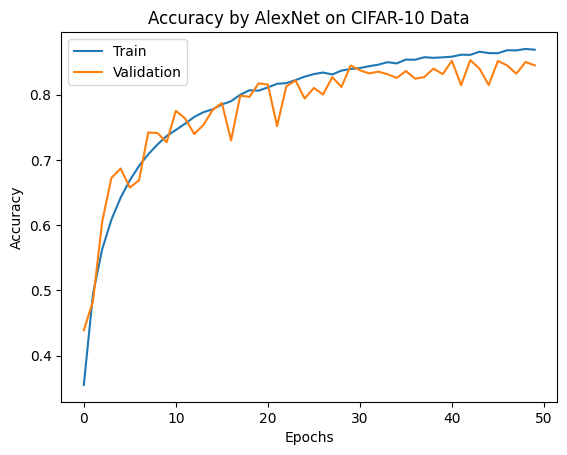

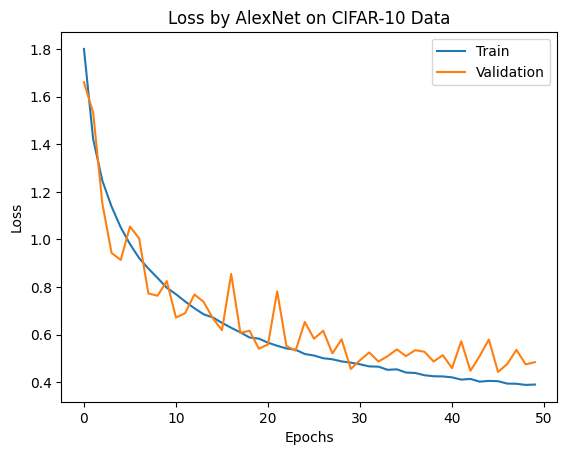

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [12]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 3ms/step


array([[914,  19,  13,   5,   4,   0,   6,   1,  21,  17],
       [  2, 967,   0,   2,   0,   0,   2,   0,   3,  24],
       [ 53,   5, 799,  13,  27,  20,  66,   5,   6,   6],
       [ 25,  17,  49, 629,  54,  74, 108,  10,  16,  18],
       [ 19,   2,  38,  20, 838,   8,  57,  14,   3,   1],
       [ 14,   6,  50, 109,  47, 695,  44,  20,   4,  11],
       [  7,   5,  12,  14,   5,   0, 948,   3,   3,   3],
       [ 28,   4,  23,  11,  45,  13,  10, 853,   2,  11],
       [ 38,  20,   1,   4,   4,   1,   2,   0, 907,  23],
       [ 20,  70,   1,   3,   1,   1,   2,   0,   6, 896]])

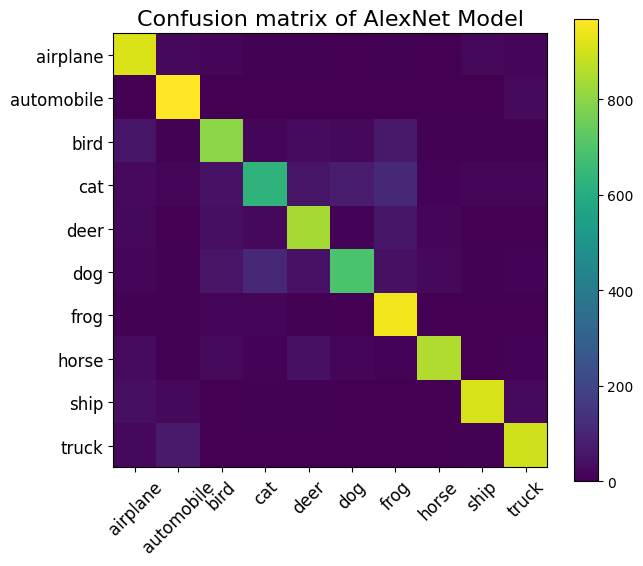

In [21]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions1))

Test accuracy by AlexNet: 0.8446


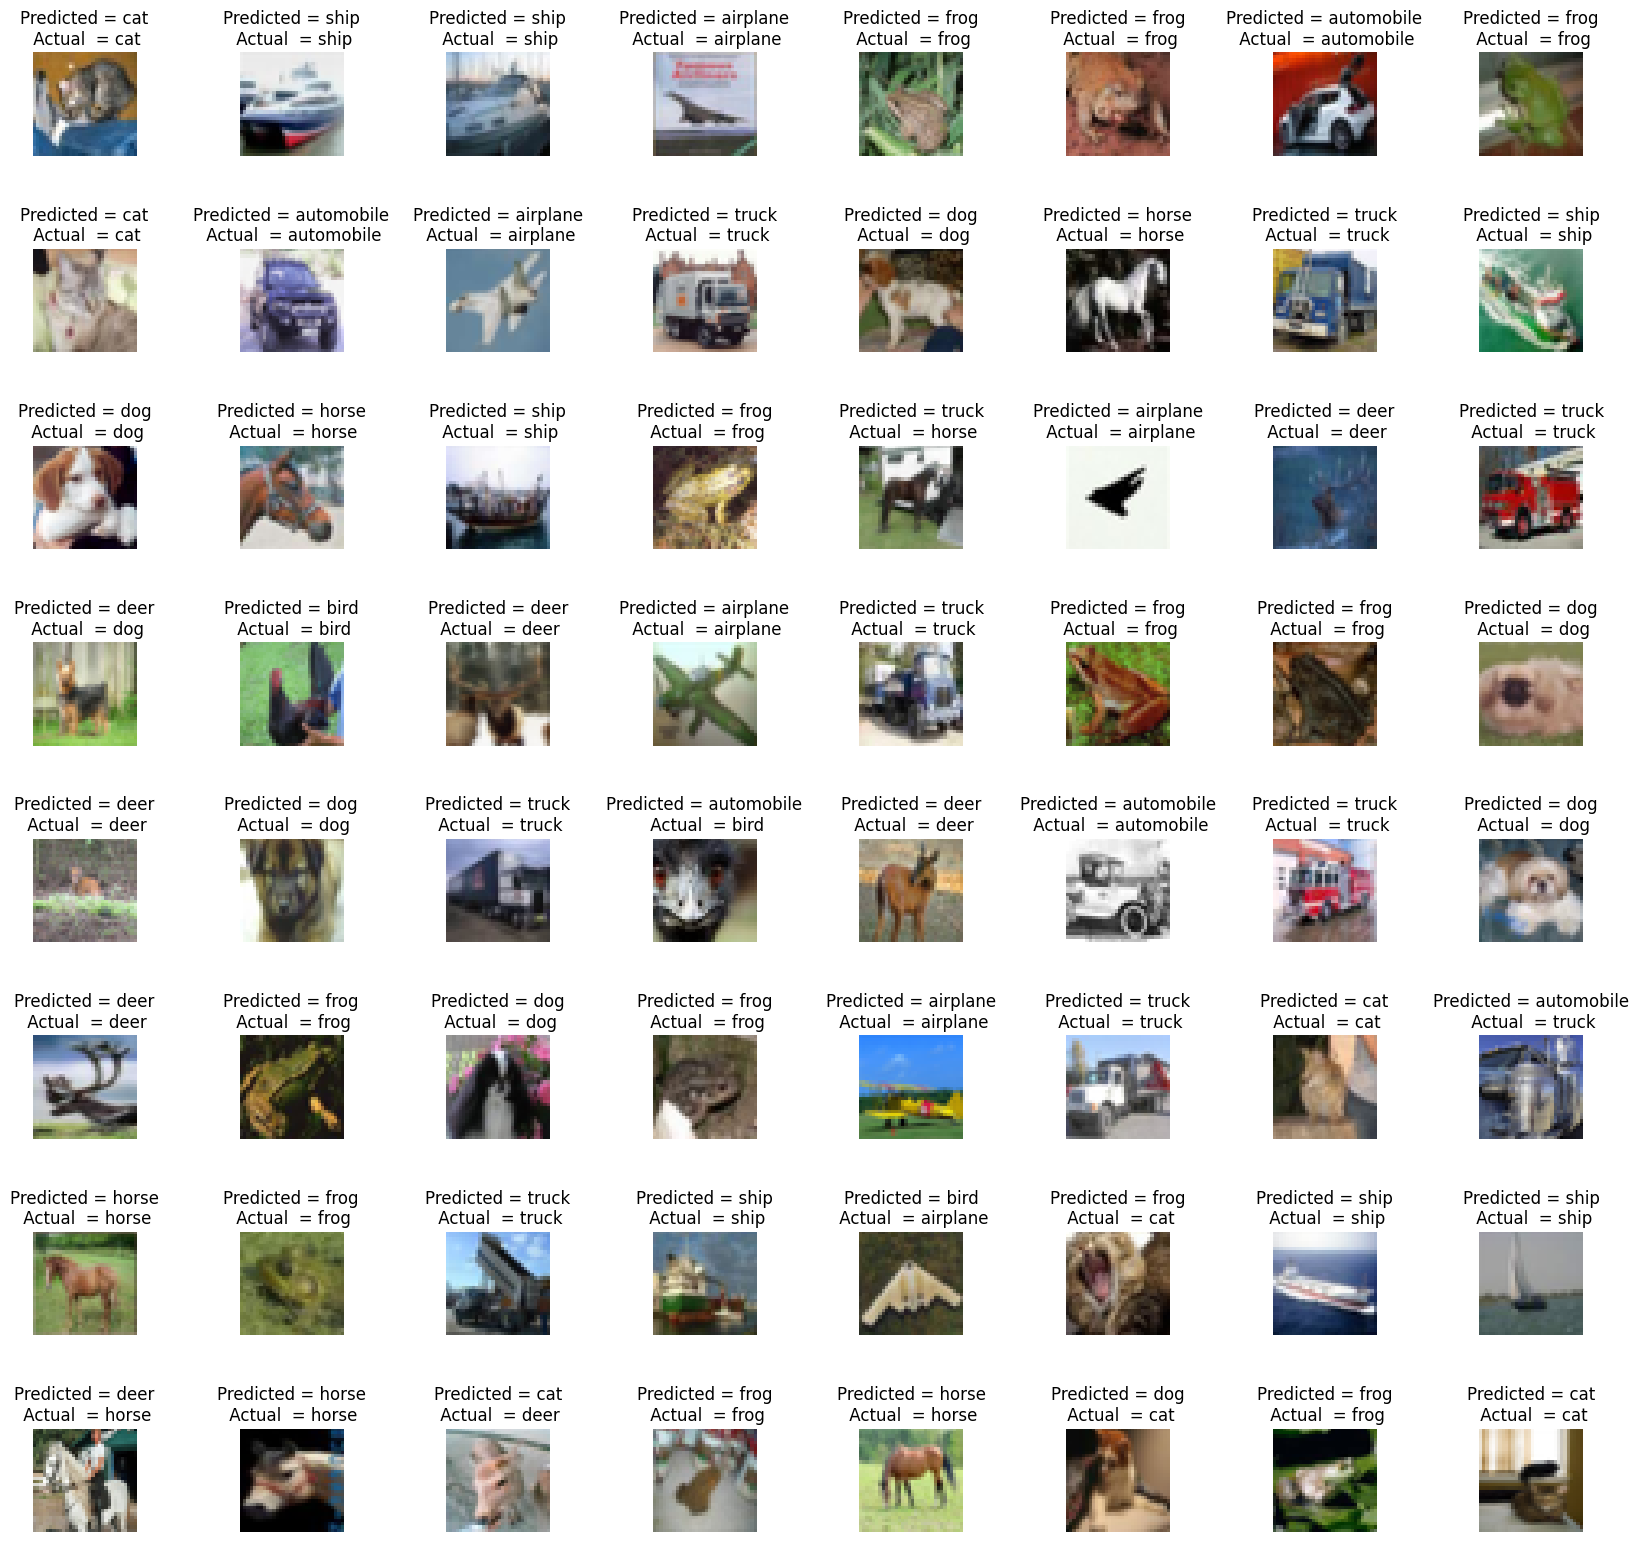

In [26]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions1[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)